In [1]:
import numpy as np
import pocomc as pc
import os
from getdist import plots, MCSamples
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
%matplotlib inline

In [2]:
names = ["b", "f"]
labels = ["b", "f"]

ref_chain = np.load("../output/BOSS_DR12_NGC_z1/samples/n2048/cov_sample/cov_sample_2048_results_v1.npy", allow_pickle=True)
reference = MCSamples(samples=ref_chain[()]["samples"], labels=labels, names=names)

Removed no burn in


In [77]:
estimates = [
    ['cov', 'sample', "Sample"],
    ['cov', 'shrinkage_emp', "Covariance shrinkage\ntarget $\mathbf{T}^{(1)}$ (empirical)"],
    ['cov', 'shrinkage_ana', "Covariance shrinkage\ntarget $\mathbf{T}^{(2)}$ (analytical)"],
    ['cov', 'NERCOME', "NERCOME"],
    ['pre', 'shrinkage_emp', "Precision shrinkage\ntarget $\mathbf{\Pi}_0^{(1)}$ (empirical)"],
    ['pre', 'shrinkage_ana', "Precision shrinkage\ntarget $\mathbf{\Pi}_0^{(2)}$ (analytical)"],
]

n = 2048
iestimate = 5 # Change this to select which estimation type above should be plotted 0,...,5

mat_type = estimates[iestimate][0]
est_type = estimates[iestimate][1]
label = estimates[iestimate][2]

if n==24:
    param_limits = {"b": (1.83, 2.05), "f": (0.3, 0.9)}
elif n==30:
    param_limits = {"b": (1.85, 2.05), "f": (0.4, 0.85)}
elif n==2048:
    param_limits = {"b": (1.88, 2.02), "f": (0.45, 0.75)} # n=2048 tick limits

In [78]:
datapath = f"../output/BOSS_DR12_NGC_z1/samples/n{n}/{mat_type}_{est_type}/"
contours = [reference]

for k in [1]: # Subset of chains included in the contour plots
    fname = f"{mat_type}_{est_type}_{n}_results_v{k}.npy"
    results = np.load(os.path.join(datapath, fname), allow_pickle=True)[()]
    chain = MCSamples(samples=results["samples"], labels=labels, names=names)
    
    contours.append(chain)
    #colors.append("blue")

Removed no burn in


In [79]:
# Source: https://stackoverflow.com/questions/31908982/multi-color-legend-entry/31909401#31909401

# define an object that will be used by the legend
class MulticolorPatch(object):
    def __init__(self, colors):
        self.colors = colors
        
# define a handler for the MulticolorPatch object
class MulticolorPatchHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        width, height = handlebox.width, handlebox.height
        patches = []
        for i, c in enumerate(orig_handle.colors):
            patches.append(plt.Rectangle([width/len(orig_handle.colors) * i - handlebox.xdescent, 
                                          -handlebox.ydescent],
                           width / len(orig_handle.colors),
                           height, 
                           facecolor=c, 
                           edgecolor='none'))

        patch = PatchCollection(patches,match_original=True)

        handlebox.add_artist(patch)
        return patch

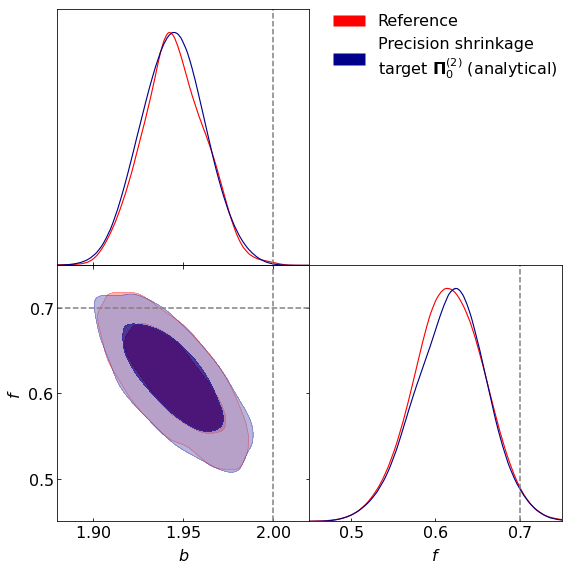

In [80]:
# Add fiducial values
b_fid = 2
f_fid = 0.7

colors = ["red", "darkblue", "royalblue", "dodgerblue"]

g = plots.getSubplotPlotter(subplot_size=4)
g.settings.axes_fontsize=16
g.settings.axes_labelsize=16
g.triangle_plot(
    contours,
    contour_colors=colors[0:len(contours)],
    filled=True,
    contour_args={'alpha':0.7},
    legend_labels=[],
    param_limits = param_limits,
)

if est_type[-3:] == "ana":
    fid_color = "gray"
    fid_ls = "--"
    g.subplots[0,0].axvline(b_fid, c=fid_color, ls=fid_ls)
    g.subplots[1,0].axvline(b_fid, c=fid_color, ls=fid_ls)
    g.subplots[1,0].axhline(f_fid, c=fid_color, ls=fid_ls)
    g.subplots[1,1].axvline(f_fid, c=fid_color, ls=fid_ls)

h = []
l = []

h.append(MulticolorPatch([colors[0]]))
l.append("Reference")

h.append(MulticolorPatch(colors[1:len(contours)]))
l.append(label)

g.fig.legend(h, l, loc='upper right', 
             handler_map={MulticolorPatch: MulticolorPatchHandler()},
             fontsize=16, frameon=False)

plt.savefig(f"../output/BOSS_DR12_NGC_z1/plots/contours/{mat_type}_{est_type}_n{n}.pdf", format="pdf", bbox_inches='tight', pad_inches = 0.1)